# Exploratory Data Analysis

In [1]:
# During the Exploratory Data Analysis (EDA) Phase of this Capstone Project 1, I generated the PandasProfilingReport.html 
#   file through another Jupyter Notebook (Capstone Project 1 - DataFrame Pandas Profiling). I did this because of the large
#   number of variables in the file (150 variables.)
#   In looking at the results, I focused on finding if there were correlations between some of the variables.
#   Below I first load a smaller sample of the modeling data, and then I focus on a few variables to see if they are correlated

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

In [3]:
#   1) LOADING THE LENDING CLUB accepted_2007_to_2018Q4.csv FILE WHILE FILTERING DOWN TO 2017-2018 DATA
apprTemp = []
df1 = pd.DataFrame()

# file to load
filename = r"C:\Users\olivi\Documents\Olivier\Training\Springboard Learning\Data Science Career Track\Capstone Project 1\Idea3 - Predicting Full Payment on LendingClub Lease Applications\datasets\accepted_2007_to_2018Q4.csv"

# use chunk size 100000
c_size = 100000

import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

for approved_chunk in pd.read_csv(filename,chunksize=c_size, iterator=True, low_memory=False):  
    
    # Filtering records via regular expression such that only records for the year 2018 are kept
    approved = approved_chunk[approved_chunk['issue_d'].str.contains('2018',na=False, regex=True)]
    
    # Putting the filtered data back together by appending each chunk to the next
    apprTemp.append(approved)

In [4]:
#   1) CONTINUED...
print("Database: CONCATENATING PROCESSED CHUNKS INTO A SINGLE DATAFRAME")
# CONCATENATING PROCESSED DATA
df1 = pd.concat(apprTemp)
print("Database: LOADED")
df1.info()

Database: CONCATENATING PROCESSED CHUNKS INTO A SINGLE DATAFRAME
Database: LOADED
<class 'pandas.core.frame.DataFrame'>
Int64Index: 495242 entries, 421097 to 1611876
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 574.3+ MB


In [5]:
sample_subset = df1.sample(frac=0.50)

In [6]:
sample_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247621 entries, 785518 to 810625
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 287.2+ MB


In [7]:
sample_subset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247621 entries, 785518 to 810625
Data columns (total 151 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          247621 non-null  object 
 1   member_id                                   0 non-null       float64
 2   loan_amnt                                   247621 non-null  float64
 3   funded_amnt                                 247621 non-null  float64
 4   funded_amnt_inv                             247621 non-null  float64
 5   term                                        247621 non-null  object 
 6   int_rate                                    247621 non-null  float64
 7   installment                                 247621 non-null  float64
 8   grade                                       247621 non-null  object 
 9   sub_grade                                   247621 non-null  obj

In [8]:
# I wanted to see if there was a correlation between fico score and Performance based on loan status
#    My assumption was that there would be a clear correlation between the Fico Score and Performance.

# I first took a look at the distribution of unique values in loan status
sample_subset.loan_status.value_counts()

Current               213662
Fully Paid             23640
Charged Off             4433
Late (31-120 days)      3639
In Grace Period         1445
Late (16-30 days)        799
Default                    3
Name: loan_status, dtype: int64

In [9]:
# From the results above, I then created a new variable named Performance where Performance can take on three values: 
#   1) Good, 2) Bad, or 3) Indeterminate.

#   1) I then defined as Good: records for which the loan_status is either 'Current' or 'Fully Paid'.
Good = ['Current','Fully Paid']
sample_subset.loc[(sample_subset['loan_status'].isin(Good)),'Performance'] = 'Good'

#   2) I then defined as Bad: records for which the loan_status is either 'Late (16-30 days)', 'Late (31-120 days)' or 'Charged Off'
Bad = ['Late (16-30 days)','Late (31-120 days)','Charged Off']
sample_subset.loc[(sample_subset['loan_status'].isin(Bad)),'Performance'] = 'Bad'

#   3) I then defined as Indeterminate: records for which the loan_status is 'In Grace Period', or 'Default'
Indeterminate = ['In Grace Period','Default']
sample_subset.loc[(sample_subset['loan_status'].isin(Indeterminate)),'Performance'] = 'Indeterminate'

# Then I took a look at distribution of records by the Performance variable I created above
sample_subset.Performance.value_counts()

Good             237302
Bad                8871
Indeterminate      1448
Name: Performance, dtype: int64

In [19]:
# I next got the average fico_range_low by Performance
fico_low = sample_subset.groupby('Performance').fico_range_low.mean()

# Then I got the average fico_range_high by Performance
fico_high = sample_subset.groupby('Performance').fico_range_high.mean()

print('\n',fico_low)
print('\n',fico_high)


 Performance
Bad              698.579078
Good             706.820402
Indeterminate    696.809392
Name: fico_range_low, dtype: float64

 Performance
Bad              702.579303
Good             710.820773
Indeterminate    700.809392
Name: fico_range_high, dtype: float64


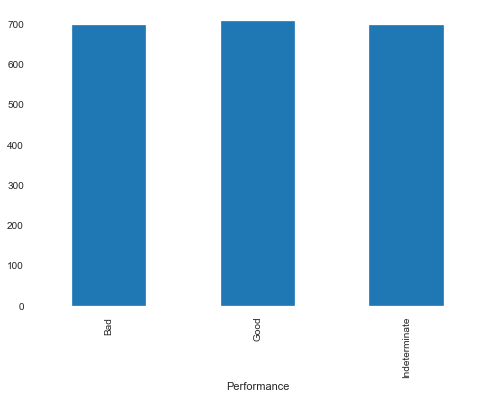

In [74]:
import matplotlib.pyplot as plt

# Below I took a look at the Performance by fico_range_low in a bar graph. 
fico_low.plot(x ='Performance', y='fico_range_low', kind = 'bar')

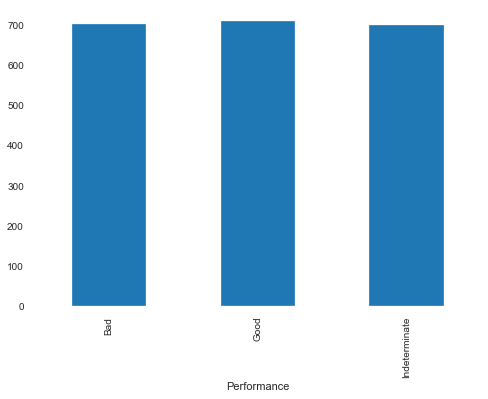

In [23]:
# As shown above, there wasn't much variance in the average fico_range_low by Performance

# Then I took a look at the Performance by fico_range_high in a bar graph. 
fico_high.plot(x ='Performance', y='fico_range_high', kind = 'bar')

In [43]:
# Again, as shown above, there wasn't much variance in the average fico_range_high by Performance

# My assumption was that there would be a high variance between at least Good and Bad Performance based on Fico Score. 
#   That was proved to not be the case.

# Then I got the Performance distribution by Purpose as the assumption was that the Purpose of taking the loan might
#   explain the performance on the loan.
prp = sample_subset.groupby(['purpose','Performance']).Performance.count()

In [44]:
print(prp)

purpose             Performance  
car                 Bad                  93
                    Good               2406
                    Indeterminate        11
credit_card         Bad                1549
                    Good              62026
                    Indeterminate       307
debt_consolidation  Bad                4702
                    Good             124221
                    Indeterminate       799
home_improvement    Bad                 608
                    Good              15598
                    Indeterminate       100
house               Bad                 159
                    Good               2567
                    Indeterminate        23
major_purchase      Bad                 328
                    Good               5553
                    Indeterminate        38
medical             Bad                 184
                    Good               3126
                    Indeterminate        16
moving              Bad                  9

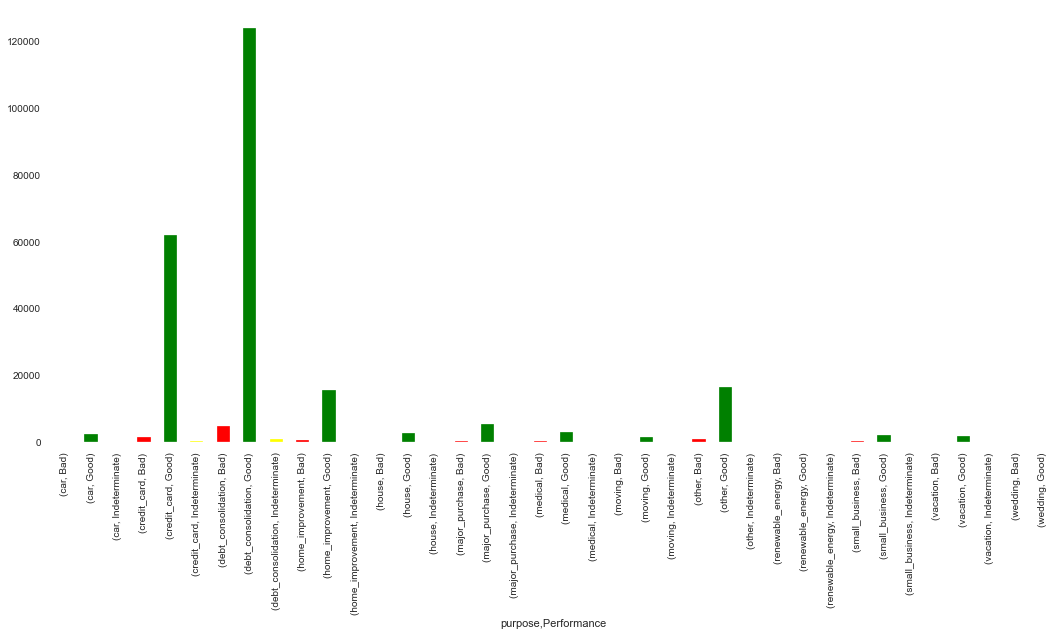

In [73]:
# As shown above the most important purpose for taking a loan was debt consolidation followed by 
#   credit card (assumming paying off credit cards)

# Simply looking at the numbers wasn't enough to really see a correlation between the Purpose for taking a loan
#   and the Performance, so I decided to get a visual by creating the bar graph below.
plt.figure(figsize=(18,8))
prp.plot(x =['purpose','Performance'], y='count' , kind = 'bar', color=['red','green','yellow'])
plt.title('Frequencies of Performance by Purpose of Loan')

In [75]:
# In looking at the bar chart above, it wasn't very clear if there was a correlation between the Purpose for taking a loan
#   and the Performance. One takeaway seemed to be that the number of Good for debt_consolidation seemed to be twice as the
#   number of Good for credit_card, while the number of Bad for debt_consolidation seemed to be 3 times that of credit_card,
#   which would indicate that it would be riskier to approve loans when the purpose was debt_consolidation.